In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [25]:
df = pd.read_csv("files/titanic.csv")
df.columns = df.columns.str.lower()

print(df.columns)
print(df.describe())

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
       passengerid    survived      pclass         age       sibsp   
count   891.000000  891.000000  891.000000  714.000000  891.000000  \
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            parch        fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.4

In [26]:
df.drop(columns=['passengerid','name','ticket','cabin'],inplace=True)

In [27]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [28]:
df['age'].fillna(df['age'].mean(), inplace=True)
df = df.dropna(subset=["embarked"])

In [29]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [30]:
print(df['sex'].unique())
print(df['embarked'].unique())
print(df['pclass'].unique())
print(df['sibsp'].unique())
print(df['parch'].unique())

['male' 'female']
['S' 'C' 'Q']
[3 1 2]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


# Data Encoding

In [31]:
columns = ["pclass","sex","sibsp","parch", "embarked"]

for column in columns:
    df = pd.get_dummies(df, columns=[column],dtype=int)

In [32]:
df.head()

,survived,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


# Data Split

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop('survived',axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data Scaler

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train.iloc[:,:2] = sc.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = sc.transform(X_test.iloc[:,:2])

# SVC Mode Training

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [36]:
y_pred = classifier.predict(X_test)

# Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report  
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))
print(classification_report(y_test, y_pred))

[[95 14]
 [17 52]]
0.8258426966292135
0.4173215826802953
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       109
           1       0.79      0.75      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.82      0.83      0.83       178



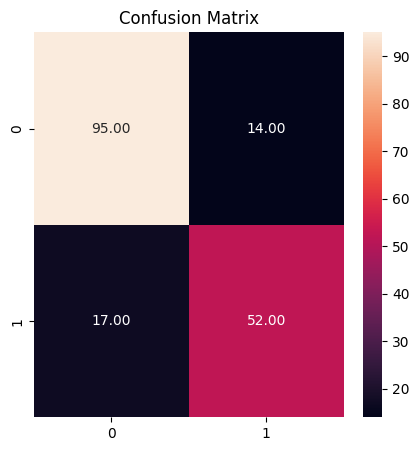

In [38]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax)
plt.title('Confusion Matrix')
plt.show()

# Tuning the hyper-parameters of an estimator

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': ['scale','auto',1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

## Best Parameters

In [42]:
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=1, kernel='poly')
{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [43]:
from sklearn.metrics import classification_report  
best_model = grid.best_estimator_
grid_predictions = best_model.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(accuracy_score(y_test, grid_predictions))
# print(mean_squared_error(y_test, grid_predictions, squared=False)) Usado apenas para modelos de regreção linear
print(classification_report(y_test,grid_predictions,target_names=["Survivant", "Non-survivant"]))

[[95 14]
 [18 51]]
0.8202247191011236
               precision    recall  f1-score   support

    Survivant       0.84      0.87      0.86       109
Non-survivant       0.78      0.74      0.76        69

     accuracy                           0.82       178
    macro avg       0.81      0.81      0.81       178
 weighted avg       0.82      0.82      0.82       178



# Simplified Solution


In [56]:
X.columns

Index(['age', 'fare', 'pclass_1', 'pclass_2', 'pclass_3', 'sex_female',
       'sex_male', 'sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4',
       'sibsp_5', 'sibsp_8', 'parch_0', 'parch_1', 'parch_2', 'parch_3',
       'parch_4', 'parch_5', 'parch_6', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [60]:
X_simple = X.loc[:,['age', 'sex_female',
       'sex_male','pclass_1','pclass_2','pclass_3']]
X_simple

,age,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.000000,0,1,0,0,1
1,38.000000,1,0,1,0,0
2,26.000000,1,0,0,0,1
3,35.000000,1,0,1,0,0
4,35.000000,0,1,0,0,1
...,...,...,...,...,...,...
886,27.000000,0,1,0,1,0
887,19.000000,1,0,1,0,0
888,29.699118,1,0,0,0,1
889,26.000000,0,1,1,0,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [62]:
sc = StandardScaler()
X_train.iloc[:,:1] = sc.fit_transform(X_train.iloc[:,:1])
X_test.iloc[:,:1] = sc.transform(X_test.iloc[:,:1])

In [63]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [64]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 17]
 [17 52]]
0.8089887640449438
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

